1. must install fonts-nanum
2. if not working cd drive need runtime drive.mount

In [1]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [5]:
drive.mount('/content/drive')

NameError: ignored

In [2]:
cd drive/MyDrive

/content/drive/MyDrive


지역을 입력하시오 : 인천


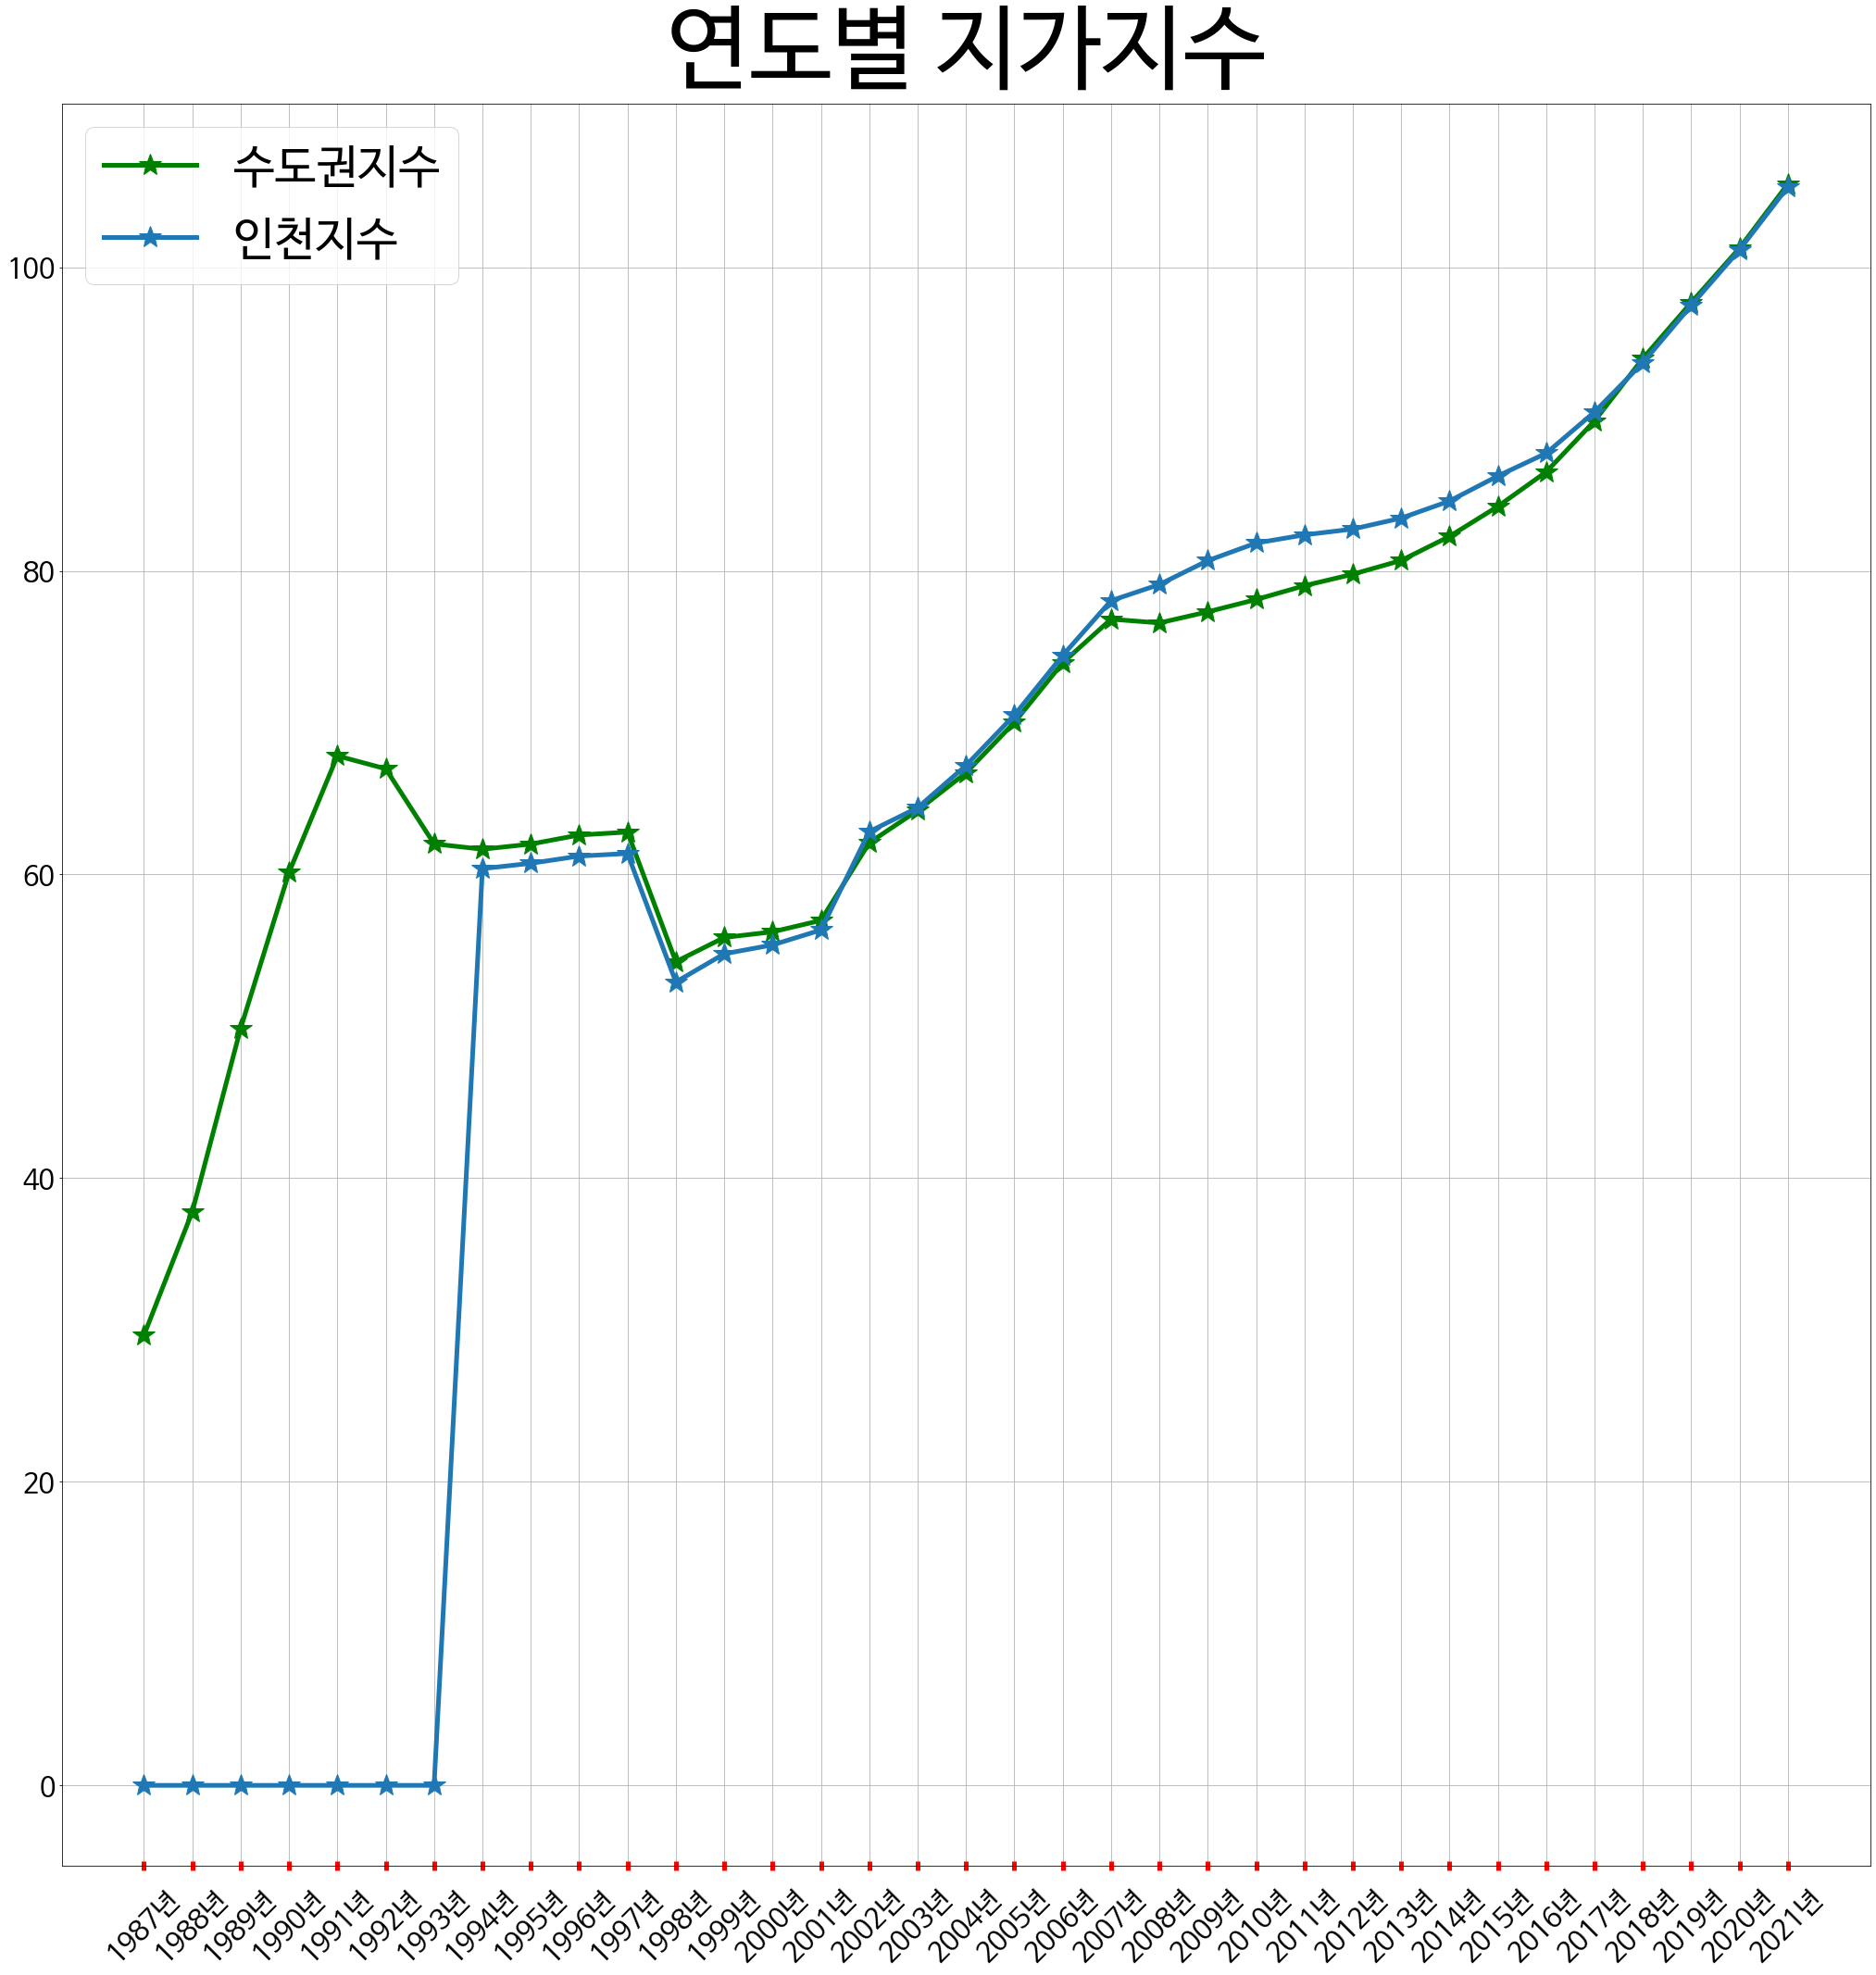

In [9]:
from google.colab import drive
#구글드라이브 연동

# from contextlib import nullcontext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib 그래프 띄우기
plt.rc('font', family='NanumBarunGothic')
"""
  한글 깨짐 폰트 설정
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf
"""

df = pd.read_excel('지가지수_연도별.xlsx',sheet_name='Sheet1',header=10)
year = df.columns[3:]

# place_name = input("지역명을 입력하시오 : ")

all_estate_index = df.values[0][3:]
# estate_indexs = df.values[7][3:] 
# estate_index = np.where(estate_indexs == '-',0, estate_indexs) #estate_indexs의 '-' 값을 0으로 바꿔주는 구문
#지수 값


index = np.arange(len(year))
#numpy 크기

row = df.iloc[:,[0,1,2]]
pd_to_np = row.to_numpy()


place_list = []

np_dict = {}

for i in range(0, pd_to_np.shape[0]):
  for j in range(pd_to_np.shape[1]):
    if type(pd_to_np[i][j]) == str :
      place_list.append(pd_to_np[i][j])      
      estate_indexs = df.values[i][3:] 
      estate_index = np.where(estate_indexs == '-',0, estate_indexs) #estate_indexs의 '-' 값을 0으로 바꿔주는 구문
      np_dict[pd_to_np[i][j]] = estate_index
      
"""
pandas를 numpy로 바꿔주며 place_list에 지역명 추가
place_list 리스트를 만든 이유는 nan을 지우기 위함이다.
이렇게 코드를 짠 이유는 pandas에서 nan제거 함수가 nan이 있는 함수의 행을 삭제 시켜버린다.
또한 numpy의 nan제거는 isnan() 함수가 있지만, 다중차원이면 안되는것 같다.
"""

while True:
  input_name = input("지역을 입력하시오 : ")
  if input_name in np_dict != False:
    break
  else:
    print("지역명을 검색할 수 없습니다.")
    



plt.figure(figsize=(len(estate_index),len(year))) #표 전체 사이즈
plt.xticks(rotation=45, fontsize=30) #x축 기울기 및 폰트 사이즈
plt.yticks(fontsize=30)
plt.tick_params(axis='x', direction='inout', length=10, pad=15,  width=5, color='r')#x축 눈금
plt.grid(True) #표 전체눈금


plt.plot(year, all_estate_index , marker='*',linewidth=5, markersize=25, color='green', label='{}지수'.format(str(place_list[1])))
plt.plot(year, np_dict[input_name] , marker='*',linewidth=5, markersize=25,label='{}지수'.format(input_name))
plt.legend(loc=2,fontsize=50) #범례
plt.title('연도별 지가지수' ,fontsize=100, pad=20)
plt.show()
# to_list = a.tolist()

